# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

tensor(5)


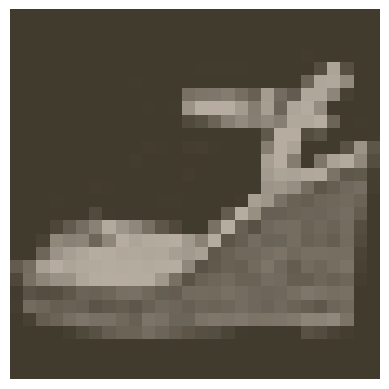

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);
print(label[0])

With the data loaded, it's time to import the necessary packages.

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [34]:
# TODO: Define your network architecture here

input_size = 784
hidden_sizes = [128, 64, 32]
output_size = 10

class Network(nn.Module):
    def __init__(self):
        super().__init__()

        # Define layers
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.fc4 = nn.Linear(hidden_sizes[2], output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.relu(x)

        return x

model = Network()
model

        

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [35]:
# TODO: Create the network, define the criterion and optimizer
model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)


In [36]:
# TODO: Train the network here
epochs = 10
print_every = 100
steps = 0

for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        images.resize_(images.size()[0], images.size()[2] * images.size()[3])

        optimizer.zero_grad()
    
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()
    
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
              "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0

Epoch: 1/10...  Loss: 2.2989
Epoch: 1/10...  Loss: 2.2918
Epoch: 1/10...  Loss: 2.2864
Epoch: 1/10...  Loss: 2.2773
Epoch: 1/10...  Loss: 2.2604
Epoch: 1/10...  Loss: 2.2301
Epoch: 1/10...  Loss: 2.1977
Epoch: 1/10...  Loss: 2.1419
Epoch: 1/10...  Loss: 2.1009
Epoch: 2/10...  Loss: 1.2603
Epoch: 2/10...  Loss: 1.9776
Epoch: 2/10...  Loss: 1.9406
Epoch: 2/10...  Loss: 1.8481
Epoch: 2/10...  Loss: 1.7648
Epoch: 2/10...  Loss: 1.7025
Epoch: 2/10...  Loss: 1.6468
Epoch: 2/10...  Loss: 1.5773
Epoch: 2/10...  Loss: 1.5483
Epoch: 3/10...  Loss: 0.3569
Epoch: 3/10...  Loss: 1.4785
Epoch: 3/10...  Loss: 1.4438
Epoch: 3/10...  Loss: 1.4357
Epoch: 3/10...  Loss: 1.4041
Epoch: 3/10...  Loss: 1.4029
Epoch: 3/10...  Loss: 1.3688
Epoch: 3/10...  Loss: 1.3635
Epoch: 3/10...  Loss: 1.3471
Epoch: 3/10...  Loss: 1.3506
Epoch: 4/10...  Loss: 1.1387
Epoch: 4/10...  Loss: 1.3248
Epoch: 4/10...  Loss: 1.3049
Epoch: 4/10...  Loss: 1.3091
Epoch: 4/10...  Loss: 1.3045
Epoch: 4/10...  Loss: 1.2987
Epoch: 4/10...

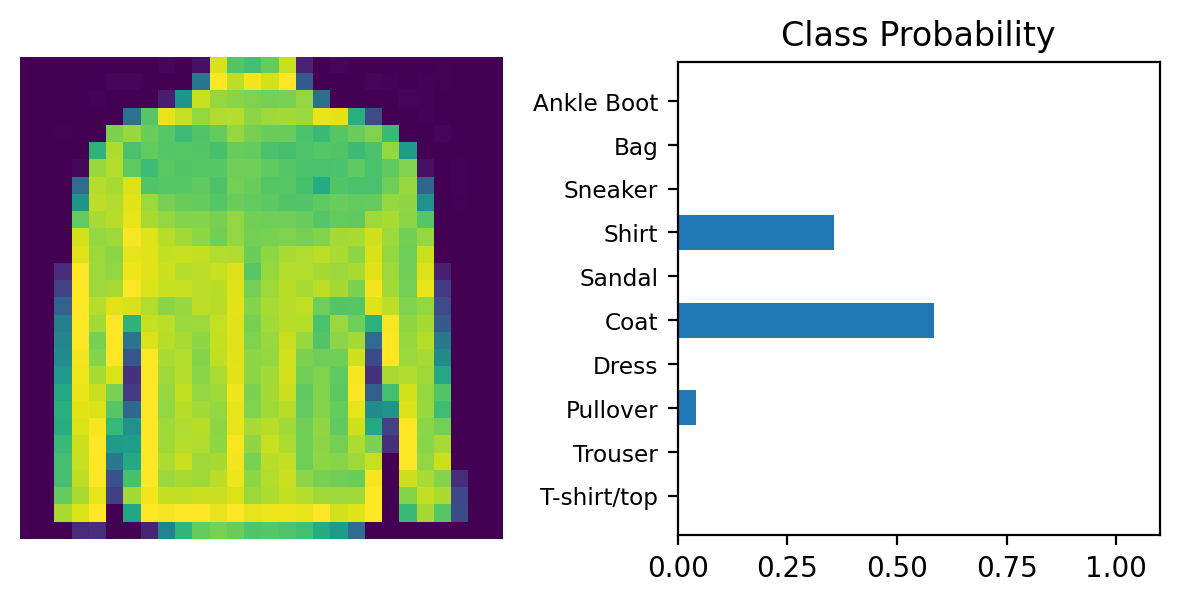

In [54]:
# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = F.softmax(model.forward(img), dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.